In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime
import seaborn as sns

In [2]:
#import the relevant dataframe and format for later use

df = pd.read_csv("C:\\Users\\Michael\\OneDrive - Nexus365\\LEO\\3YP Coding\\Electricity Modelling\\SortedRadCamHHElectricity.csv",)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.sort_values(by="Date")

#extract 2018 data from dataframe
df = df[df['Date'].dt.year == 2018] 

In [3]:
df.head()


,Date,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,24:00:00
415,2018-01-01,3.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,...,4.0,2.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0
416,2018-01-02,2.0,3.0,2.0,2.0,3.0,2.0,3.0,2.0,3.0,...,2.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0
417,2018-01-03,3.0,2.0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,...,3.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,3.0
418,2018-01-04,2.0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,2.0,...,2.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0
419,2018-01-05,2.0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,2.0,...,2.0,2.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,2.0


In [4]:
#create columns for month, day, and daily sum

df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()
df['Date']=df['Date'].dt.date
df['Daily Sum'] = df.sum(axis=1)
df = df[['Month','Day','Daily Sum']]

In [5]:
#format for heatmap plotting

df1 = df.groupby(['Month', 'Day'],sort=False).agg(['mean'])
df1.columns=df1.columns.droplevel(0)
df1.reset_index(inplace=True)
heatmap_data = pd.pivot_table(df1, values='mean', index=['Month'], columns='Day')

In [6]:
#create heatmap x axis
cols = list(heatmap_data)
cols.insert(0, cols.pop(cols.index('Monday')))
cols.insert(1, cols.pop(cols.index('Tuesday')))
cols.insert(2, cols.pop(cols.index('Wednesday')))
cols.insert(3, cols.pop(cols.index('Thursday')))
cols.insert(4, cols.pop(cols.index('Friday')))
cols.insert(5, cols.pop(cols.index('Saturday')))
heatmap_data = heatmap_data.loc[:, cols]

#heatmap y axis
Months=df1.Month.unique().tolist()
heatmap_data=heatmap_data.loc[Months]

Text(0.5, 1.0, 'RadCam Mean Electricity usage (kWh) 2018')

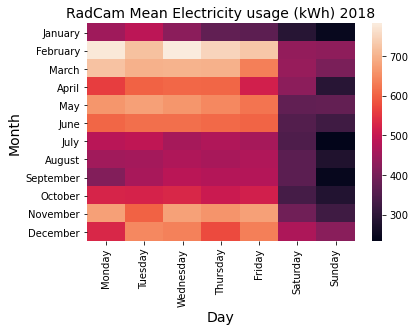

In [9]:
#plot the heatmap
sns.heatmap(heatmap_data)
plt.xlabel("Day", size=14)
plt.ylabel("Month", size=14)
plt.title("RadCam Mean Electricity usage (kWh) 2018", size=14)
